In [1]:
from main import Solver
import torch
from synth_data import create_synthData_new, create_synthData_multi
from validation_method import FS_MCC
import numpy as np

In [2]:
# Hyper Params Section
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using", torch.cuda.device_count(), "GPUs")

Solver = Solver(device)
## Evaluation params
ACC_list = []
FS_list = []
MCC_list = []


Using 0 GPUs


In [3]:
## Scenario 1
FS = []
MCC = []
ACC = []
N = 400
views = create_synthData_new(N, mode=1, F=20)    
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")
    
## train hyper

#b0, obj = Solver.tune_hyper(x_list=views, set_params=1,max_params=50,iters=100)
#print(b0)
b0=1
print("SNGCCA Started!")
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)
    
    ## fit results
    u = Solver._get_outputs(views, 1e-7, 200, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC.append(acc)
    FS.append(f1)
    MCC.append(mcc)

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])
SNGCCA Started!


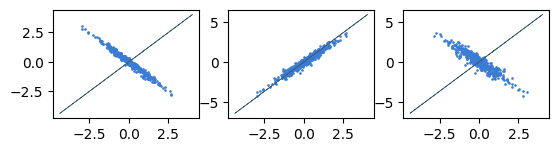

In [4]:
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d

fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

x1 = views[0] @ u[0]
xg1 = views[0][:,0] + views[0][:,1]
y1 = views[1] @ u[1]
yg1 = views[1][:,0] + views[1][:,1]
z1 = views[2] @ u[2]
zg1 = views[2][:,0] + views[2][:,1]
coeff00 =  polyfit(xg1, zg1, 1)
coeff01 = polyfit(yg1, zg1, 1)

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')


In [20]:
macc = np.mean(ACC)
sdacc = np.std(ACC)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS)
sdf = np.std(FS)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC)
sdmcc = np.std(MCC)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

1.0 0.0
1.0 0.0
1.0 0.0


In [19]:
## Scenario 2
from validation_method import FS_MCC
ACC_2 = []
FS_2 = []
MCC_2 = []
N = 400
views = create_synthData_new(N, mode=2, F=20)
views = [views[2],views[0],views[1]]
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0 = 10
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)
    
    ## fit results
    u = Solver.SNGCCA.fit(views, 1e-7, 300, (b0,b0,b0), loss="Momentum", patience=10, logging=1)
    #u = Solver._get_outputs(views, 1e-7, 300, (b0,b0,b0),logging=1)

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_2.append(acc)
    FS_2.append(f1)
    MCC_2.append(mcc)
print(u)

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])
iter= 1 diff= tensor(0.0261) obj= tensor(0.0021)
iter= 2 diff= tensor(0.1121) obj= tensor(0.0028)
iter= 3 diff= tensor(0.0396) obj= tensor(0.0033)
iter= 4 diff= tensor(0.0179) obj= tensor(0.0045)
iter= 5 diff= tensor(0.0089) obj= tensor(0.0052)
iter= 6 diff= tensor(0.0339) obj= tensor(0.0062)
iter= 7 diff= tensor(0.0316) obj= tensor(0.0068)
iter= 8 diff= tensor(0.0003) obj= tensor(0.0069)
iter= 9 diff= tensor(0.0078) obj= tensor(0.0072)
iter= 10 diff= tensor(0.0047) obj= tensor(0.0076)
iter= 11 diff= tensor(0.0099) obj= tensor(0.0078)
iter= 12 diff= tensor(0.0006) obj= tensor(0.0078)
iter= 13 diff= tensor(0.0070) obj= tensor(0.0082)
iter= 14 diff= tensor(0.0183) obj= tensor(0.0086)
iter= 15 diff= tensor(0.0180) obj= tensor(0.0090)
iter= 16 diff= tensor(0.0026) obj= tensor(0.0090)
iter= 17 diff= tensor(0.0031) obj= tensor(0.0092)
iter= 18 diff= tensor(0.0057) obj= tensor(0

iter= 162 diff= tensor(0.0043) obj= tensor(0.0808)
iter= 163 diff= tensor(0.0003) obj= tensor(0.0817)
iter= 164 diff= tensor(0.0022) obj= tensor(0.0813)
iter= 165 diff= tensor(0.0198) obj= tensor(0.0786)
iter= 166 diff= tensor(0.0020) obj= tensor(0.0816)
iter= 167 diff= tensor(0.0103) obj= tensor(0.0804)
iter= 168 diff= tensor(0.0071) obj= tensor(0.0809)
iter= 169 diff= tensor(0.0009) obj= tensor(0.0822)
iter= 170 diff= tensor(0.0049) obj= tensor(0.0814)
iter= 171 diff= tensor(0.0017) obj= tensor(0.0819)
iter= 172 diff= tensor(0.0077) obj= tensor(0.0809)
iter= 173 diff= tensor(0.0094) obj= tensor(0.0809)
iter= 174 diff= tensor(0.0028) obj= tensor(0.0820)
iter= 175 diff= tensor(0.0010) obj= tensor(0.0827)
iter= 176 diff= tensor(7.9265e-05) obj= tensor(0.0827)
iter= 177 diff= tensor(0.0005) obj= tensor(0.0828)
iter= 178 diff= tensor(0.0059) obj= tensor(0.0818)
iter= 179 diff= tensor(0.0052) obj= tensor(0.0820)
iter= 180 diff= tensor(0.0059) obj= tensor(0.0819)
iter= 181 diff= tensor(4.29

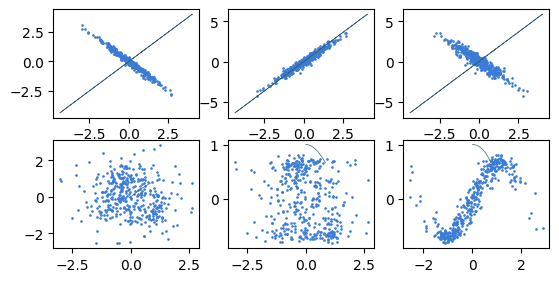

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

x2 = views[0] @ u[0]
xg2 = sorted(views[0][:,0] + views[0][:,1])
y2 = views[1] @ u[1]
yg2 = views[1][:,0] + views[1][:,1]
z2 = views[2] @ u[2]
zg2 = views[2][:,0] + views[2][:,1]


ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')

ax4.scatter(x2,y2,s=0.8,c='#3a7bd5')
ax4.plot(xg2, np.sin(xg2), linewidth=0.5, c='#3a6073')
ax5.scatter(x2,z2,s=0.8,c='#3a7bd5')
ax5.plot(xg2,np.cos(xg2),linewidth=0.5,c='#3a6073')
ax6.scatter(y2,z2,s=0.8,c='#3a7bd5')
ax6.plot(np.sin(xg2),np.cos(xg2),linewidth=0.5,c='#3a6073')



In [10]:
macc = np.mean(ACC_2)
sdacc = np.std(ACC_2)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_2)
sdf = np.std(FS_2)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_2)
sdmcc = np.std(MCC_2)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9434999999999999 0.14647515906194547
0.8933763128080017 0.2738150324505891
0.8753058894507663 0.323405773174309


In [12]:
## Scenario 3
FS_3 = []
MCC_3 = []
ACC_3 = []
N = 400
views = create_synthData_new(N, mode=3, F=20)

print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0=5.00
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)

    ## fit results
    u = Solver._get_outputs(views, 1e-7, 200, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_3.append(acc)
    FS_3.append(f1)
    MCC_3.append(mcc)


input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


In [12]:
macc = np.mean(ACC_3)
sdacc = np.std(ACC_3)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_3)
sdf = np.std(FS_3)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_3)
sdmcc = np.std(MCC_3)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9926666666666665 0.00922556833539872
0.9664835164835165 0.04168226170336305
0.9640339979497794 0.044583148679418254


In [13]:
print(ACC_list)
print(FS_list)
print(MCC_list)

[[0.9975999999999999, 0.00639583197611279], [0.9434999999999999, 0.14647515906194547], [0.9926666666666665, 0.00922556833539872]]
[[0.9890549450549452, 0.02889918516206012], [0.8933763128080017, 0.2738150324505891], [0.9664835164835165, 0.04168226170336305]]
[[0.9882629549372325, 0.030909214124223112], [0.8753058894507663, 0.323405773174309], [0.9640339979497794, 0.044583148679418254]]


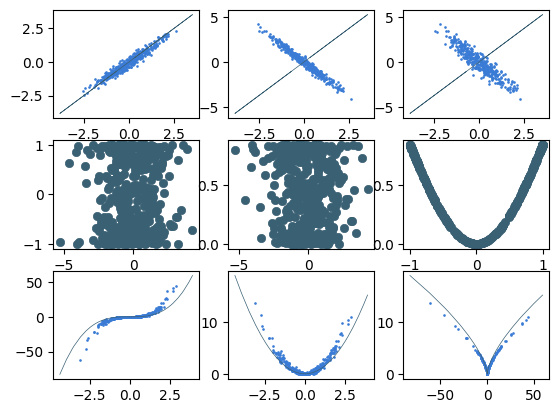

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x3 = views[0] @ u[0]
xg3 = sorted(views[0][:,0] + views[0][:,1])
y3 = views[1] @ u[1]
z3 = views[2] @ u[2]

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,coeff00[0] * yg1 + coeff00[1],linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
ax3.plot(yg1,coeff01[0] * yg1 + coeff01[1],linewidth=0.5,c='#3a6073')

#ax4.scatter(x2,y2,s=0.8,c='#3a7bd5')
ax4.scatter(xg2, yg2, linewidth=0.5, c='#3a6073')
#ax5.scatter(x2,z2,s=0.8,c='#3a7bd5')
ax5.scatter(xg2,zg2,linewidth=0.5,c='#3a6073')
#ax6.scatter(y2,z2,s=0.8,c='#3a7bd5')
ax6.scatter(yg2,zg2,linewidth=0.5,c='#3a6073')

ax7.scatter(x3,y3,s=0.8,c='#3a7bd5')
ax7.plot(xg3,np.power(xg3,3),linewidth=0.5,c='#3a6073')
ax8.scatter(x3,z3,s=0.8,c='#3a7bd5')
ax8.plot(xg3,np.power(xg3,2),linewidth=0.5,c='#3a6073')
ax9.scatter(y3,z3,s=0.8,c='#3a7bd5')
ax9.plot(np.power(xg3,3),np.power(xg3,2),linewidth=0.5,c='#3a6073')